# Neural Network Development - CIFAR-10 Classification

**Deep Learning Project - Interactive Development Notebook**

This notebook demonstrates the development of a Convolutional Neural Network (CNN) for image classification on the CIFAR-10 dataset using TensorFlow/Keras.


## Table of Contents

1. [Section A: Interactive Development Environment](#section-a)
   - Setup and Imports
   - Data Loading
   - Model Building
2. [Section B: Model Summary Interpretation](#section-b)
3. [Section C: Layer Discussion](#section-c)
4. [Section D: Parameter Count and Model Complexity](#section-d)
5. [Section E: Hyperparameter Tuning](#section-e)
6. [Model Training and Evaluation](#training-evaluation)


---

## Section A: Interactive Development Environment

### A.1 Setup and Imports


In [21]:
# Standard library imports
import os
import numpy as np
import matplotlib.pyplot as plt

# Deep learning framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Note: KerasClassifier wrapper is deprecated in newer TensorFlow versions
# We'll use a different approach for hyperparameter tuning if needed

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display TensorFlow version
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.20.0
Keras version: 3.13.0


### A.2 Data Loading

Load the prepared CIFAR-10 dataset from the `data/prepared/` directory.


In [22]:
# Load prepared dataset
data_dir = "data/prepared"

# Load data splits
x_train = np.load(os.path.join(data_dir, "x_train.npy"))
y_train = np.load(os.path.join(data_dir, "y_train.npy"))
x_val = np.load(os.path.join(data_dir, "x_val.npy"))
y_val = np.load(os.path.join(data_dir, "y_val.npy"))
x_test = np.load(os.path.join(data_dir, "x_test.npy"))
y_test = np.load(os.path.join(data_dir, "y_test.npy"))

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("=" * 60)
print("Dataset Information")
print("=" * 60)

# Display data shapes
print("\nData Shapes:")
print("-" * 60)
print(f"Training data shape:      {x_train.shape}")
print(f"Training labels shape:    {y_train.shape}")
print(f"Validation data shape:    {x_val.shape}")
print(f"Validation labels shape:  {y_val.shape}")
print(f"Test data shape:          {x_test.shape}")
print(f"Test labels shape:        {y_test.shape}")

# Display data types
print("\nData Types:")
print("-" * 60)
print(f"Training data dtype:      {x_train.dtype}")
print(f"Training labels dtype:    {y_train.dtype}")

# Display value ranges and statistics
print("\nData Statistics:")
print("-" * 60)
print(f"Training data - Min: {x_train.min():.4f}, Max: {x_train.max():.4f}, Mean: {x_train.mean():.4f}, Std: {x_train.std():.4f}")
print(f"Validation data - Min: {x_val.min():.4f}, Max: {x_val.max():.4f}, Mean: {x_val.mean():.4f}, Std: {x_val.std():.4f}")
print(f"Test data - Min: {x_test.min():.4f}, Max: {x_test.max():.4f}, Mean: {x_test.mean():.4f}, Std: {x_test.std():.4f}")

# Display class information
print("\nClass Information:")
print("-" * 60)
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

# Display label distribution
print("\nLabel Distribution:")
print("-" * 60)
print("Training set:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_train == i)
    percentage = (count / len(y_train)) * 100
    print(f"  {class_name:12s}: {count:5d} ({percentage:5.2f}%)")

print("\nValidation set:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_val == i)
    percentage = (count / len(y_val)) * 100
    print(f"  {class_name:12s}: {count:5d} ({percentage:5.2f}%)")

print("\nTest set:")
for i, class_name in enumerate(class_names):
    count = np.sum(y_test == i)
    percentage = (count / len(y_test)) * 100
    print(f"  {class_name:12s}: {count:5d} ({percentage:5.2f}%)")

print("\nTotal samples:")
print(f"  Training:   {len(x_train):,}")
print(f"  Validation: {len(x_val):,}")
print(f"  Test:       {len(x_test):,}")
print(f"  Total:      {len(x_train) + len(x_val) + len(x_test):,}")


Dataset Information

Data Shapes:
------------------------------------------------------------
Training data shape:      (40000, 32, 32, 3)
Training labels shape:    (40000, 1)
Validation data shape:    (10000, 32, 32, 3)
Validation labels shape:  (10000, 1)
Test data shape:          (10000, 32, 32, 3)
Test labels shape:        (10000, 1)

Data Types:
------------------------------------------------------------
Training data dtype:      float32
Training labels dtype:    uint8

Data Statistics:
------------------------------------------------------------
Training data - Min: 0.0000, Max: 1.0000, Mean: 0.4731, Std: 0.2515
Validation data - Min: 0.0000, Max: 1.0000, Mean: 0.4744, Std: 0.2517
Test data - Min: 0.0000, Max: 1.0000, Mean: 0.4766, Std: 0.2512

Class Information:
------------------------------------------------------------
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Label Distribution:
----------

In [23]:
# Prepare labels for categorical crossentropy
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("Training labels (categorical) shape:", y_train_cat.shape)
print("Validation labels (categorical) shape:", y_val_cat.shape)
print("Test labels (categorical) shape:", y_test_cat.shape)


Training labels (categorical) shape: (40000, 10)
Validation labels (categorical) shape: (10000, 10)
Test labels (categorical) shape: (10000, 10)


In [24]:
### A.2.1 Data Visualization

#Lets visualize the dataset to better understand the data distribution and sample images.


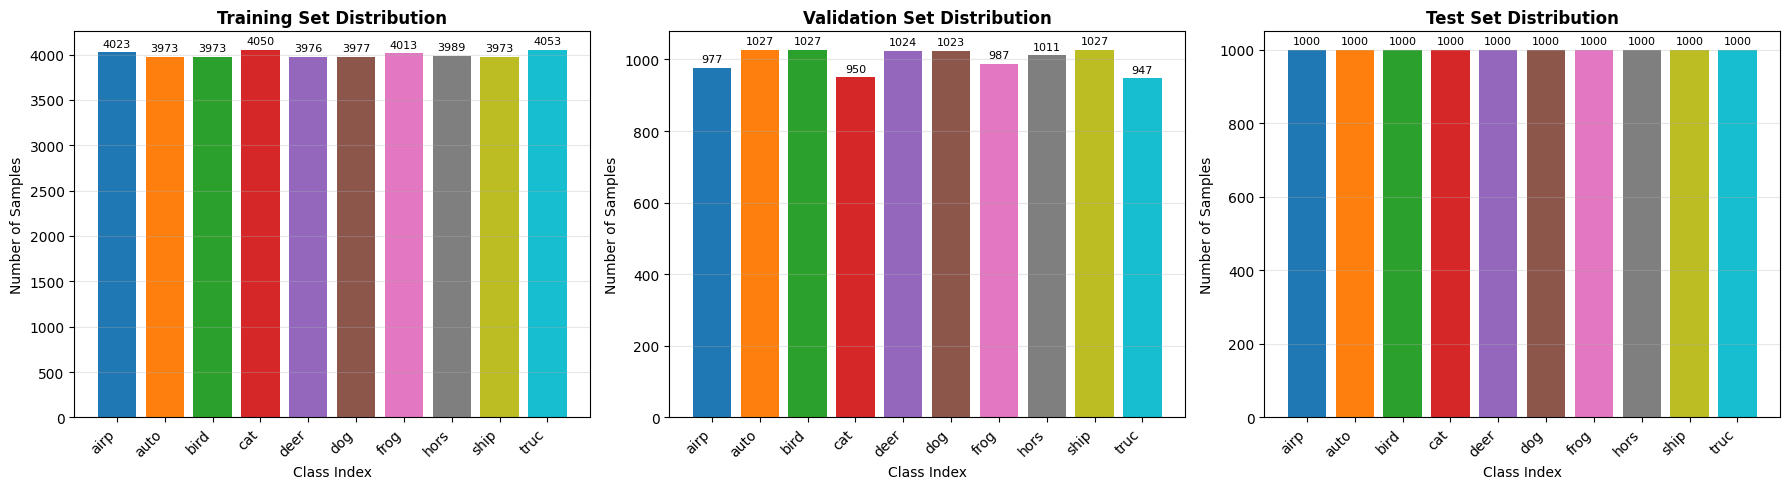

In [25]:
# Visualize class distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for split_idx, (data, labels, split_name) in enumerate([
    (x_train, y_train, 'Training'),
    (x_val, y_val, 'Validation'),
    (x_test, y_test, 'Test')
]):
    # Count samples per class
    class_counts = [np.sum(labels.flatten() == i) for i in range(10)]
    
    # Create bar plot
    axes[split_idx].bar(range(10), class_counts, color=plt.cm.tab10(range(10)))
    axes[split_idx].set_xlabel('Class Index', fontsize=10)
    axes[split_idx].set_ylabel('Number of Samples', fontsize=10)
    axes[split_idx].set_title(f'{split_name} Set Distribution', fontsize=12, fontweight='bold')
    axes[split_idx].set_xticks(range(10))
    axes[split_idx].set_xticklabels([class_names[i][:4] for i in range(10)], rotation=45, ha='right')
    axes[split_idx].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, count in enumerate(class_counts):
        axes[split_idx].text(i, count + max(class_counts)*0.01, str(count), 
                           ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


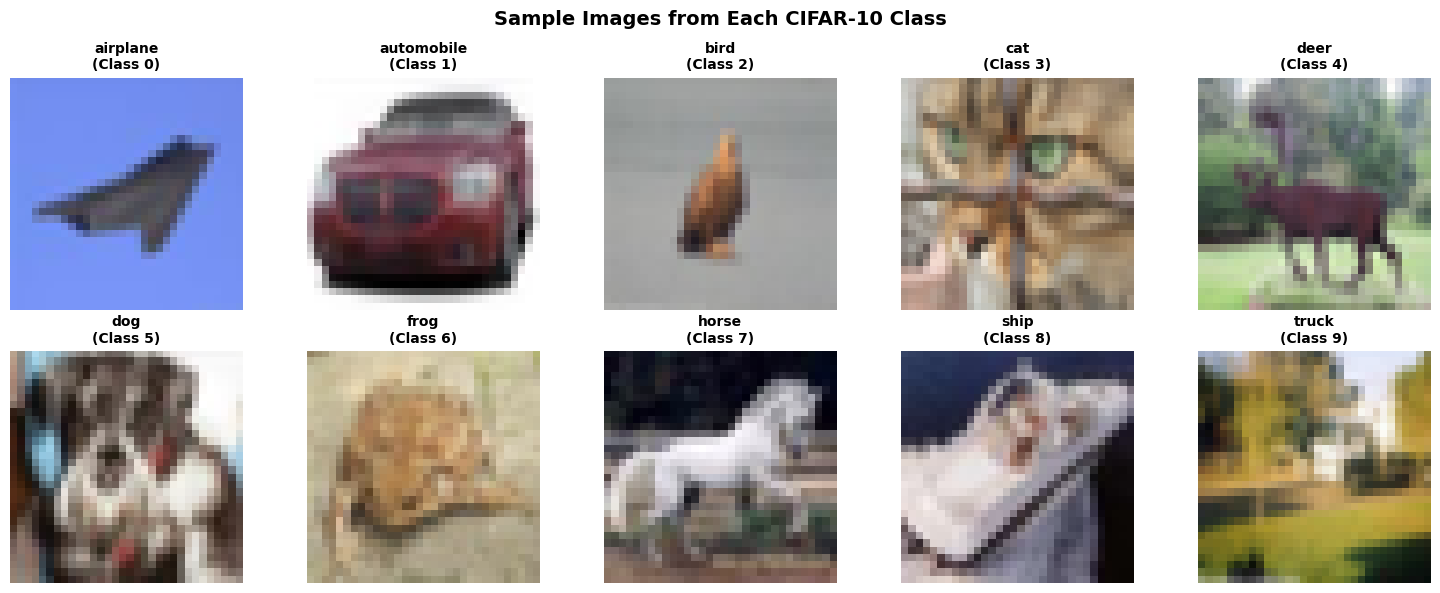

In [26]:
# Visualize sample images from each class in the training set
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for class_idx in range(10):
    # Find first occurrence of each class
    class_indices = np.where(y_train.flatten() == class_idx)[0]
    if len(class_indices) > 0:
        img_idx = class_indices[0]
        row = class_idx // 5
        col = class_idx % 5
        axes[row, col].imshow(x_train[img_idx], interpolation='nearest')
        axes[row, col].set_title(f"{class_names[class_idx]}\n(Class {class_idx})", 
                                fontsize=10, fontweight='bold')
        axes[row, col].axis('off')
plt.suptitle('Sample Images from Each CIFAR-10 Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


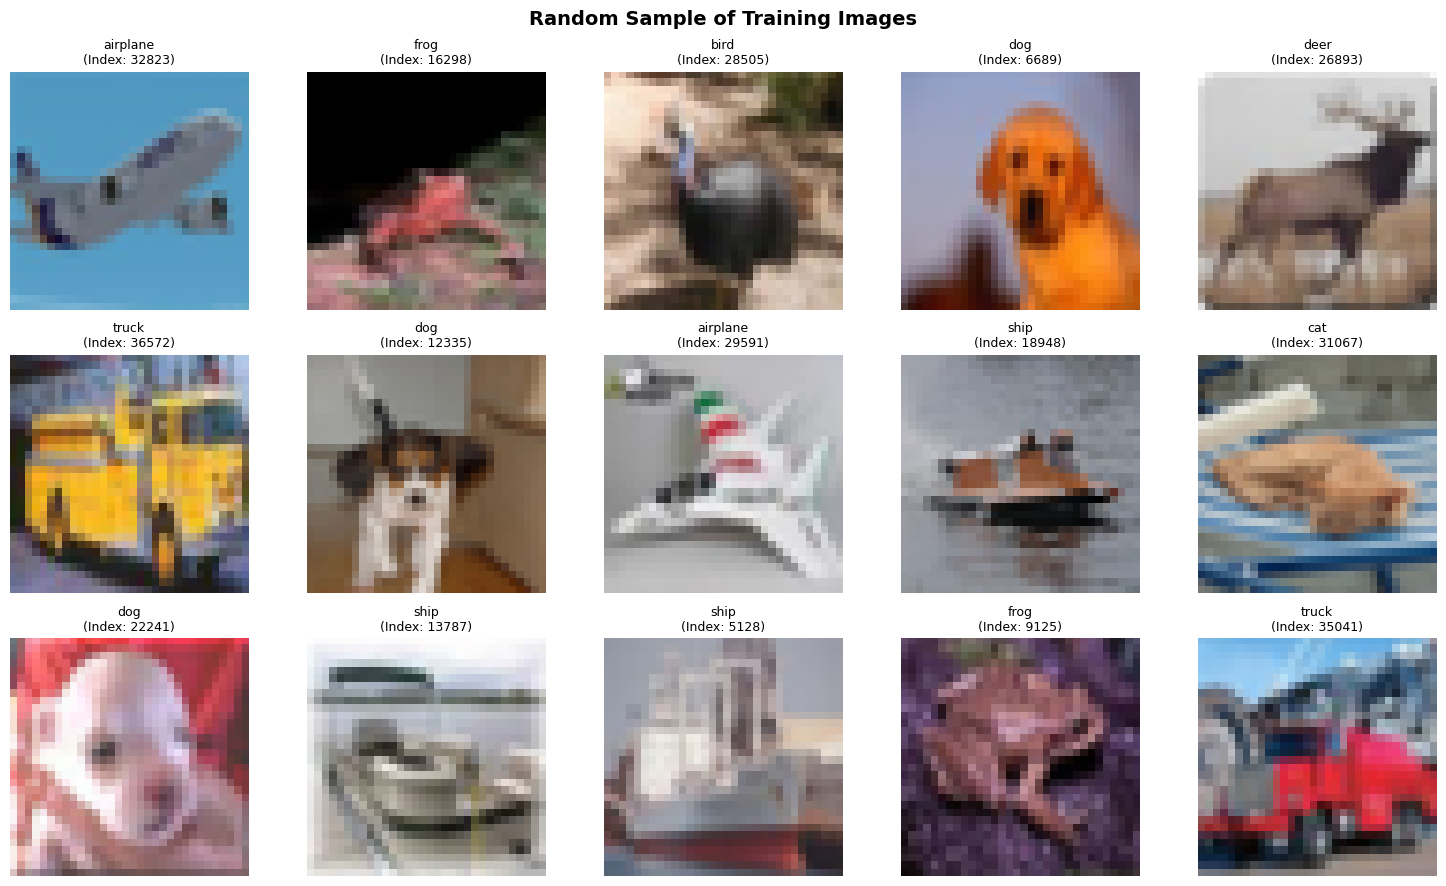

In [27]:
# Display a random sample of images from the training set
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(len(x_train), size=15, replace=False)

for idx, img_idx in enumerate(random_indices):
    row = idx // 5
    col = idx % 5
    axes[row, col].imshow(x_train[img_idx], interpolation='nearest')
    class_label = y_train[img_idx][0]
    axes[row, col].set_title(f"{class_names[class_label]}\n(Index: {img_idx})", 
                            fontsize=9)
    axes[row, col].axis('off')

plt.suptitle('Random Sample of Training Images', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### A.3 Model Building

Build a Convolutional Neural Network (CNN) architecture for CIFAR-10 classification.


In [28]:
# Define CNN model architecture
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """
    Creates a CNN model for CIFAR-10 classification.
    
    Architecture:
    - Convolutional layers for feature extraction
    - Pooling layers for dimensionality reduction
    - Dense layers for classification
    """
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'),
        layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
        layers.Dropout(0.25, name='dropout_1'),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_3'),
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_4'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
        layers.Dropout(0.25, name='dropout_2'),
        
        # Third convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_5'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_3'),
        layers.Dropout(0.25, name='dropout_3'),
        
        # Flatten layer to convert 2D feature maps to 1D vector
        layers.Flatten(name='flatten'),
        
        # Dense (fully connected) layers for classification
        layers.Dense(512, activation='relu', name='dense_1'),
        layers.Dropout(0.5, name='dropout_4'),
        layers.Dense(num_classes, activation='softmax', name='dense_output')
    ])
    
    return model

# Create the model
model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model created and compiled successfully!")


Model created and compiled successfully!


c:\PersonalProjects\d802-deep-learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

## Section B: Model Summary Interpretation

### B.1 Library/Framework for Model Summary

In TensorFlow/Keras, we use the **`model.summary()`** method to generate a comprehensive summary of the neural network architecture. This is the primary tool for viewing the model structure, layer information, and parameter counts.


In [29]:
# Generate and display model summary
print("=" * 70)
print("MODEL SUMMARY")
print("=" * 70)
model.summary()
print("=" * 70)


MODEL SUMMARY


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,050 (1.54 MB)

 Trainable params: 403,050 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

### B.1.a Interpreting the Number of Parameters

The model summary displays the number of parameters for each layer. Understanding parameter counts helps assess model complexity and computational requirements.


In [30]:
# Extract and analyze parameter counts
total_params = model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Non-trainable parameters: {non_trainable_params:,}")


Total parameters: 403,050
Trainable parameters: 403,050
Non-trainable parameters: 0


### B.1.b Understanding Layer Types

The model summary shows different layer types, each serving a specific purpose in the neural network.


In [31]:
# Count and categorize layers by type
layer_types = {}
for layer in model.layers:
    layer_type = type(layer).__name__
    layer_types[layer_type] = layer_types.get(layer_type, 0) + 1

print("Layer type distribution:")
for layer_type, count in sorted(layer_types.items()):
    print(f"  {layer_type}: {count}")


Layer type distribution:
  Conv2D: 5
  Dense: 2
  Dropout: 4
  Flatten: 1
  MaxPooling2D: 3


### B.1.c Understanding Output Shapes

Each layer transforms the input tensor, producing an output with specific dimensions. The output shape column shows how data flows through the network.


In [32]:
# Display output shapes for each layer
# In TensorFlow/Keras 3.x, we can get output shapes by creating a functional model
# that traces through each layer, or by accessing the model's internal state.
print("Layer Output Shapes:")
print("=" * 60)

# Method: Build output shapes by tracing through the model
# Create a dummy input tensor
dummy_input = tf.zeros((1, 32, 32, 3))

# Trace through each layer to get output shapes
current_input = dummy_input
for i, layer in enumerate(model.layers):
    try:
        # Pass input through the layer
        current_output = layer(current_input)
        output_shape = tuple(current_output.shape.as_list())
        current_input = current_output  # Update for next layer
        print(f"{i+1:2d}. {layer.name:20s} -> Output shape: {output_shape}")
    except Exception as e:
        # Fallback: try to get shape information from layer configuration
        try:
            if hasattr(layer, 'output_shape'):
                output_shape = layer.output_shape
            elif hasattr(layer, 'compute_output_shape'):
                output_shape = layer.compute_output_shape(current_input.shape)
            else:
                output_shape = "N/A"
            print(f"{i+1:2d}. {layer.name:20s} -> Output shape: {output_shape}")
        except:
            print(f"{i+1:2d}. {layer.name:20s} -> Output shape: Unable to determine")


Layer Output Shapes:
 1. conv2d_1             -> Output shape: (1, 30, 30, 32)
 2. conv2d_2             -> Output shape: (1, 28, 28, 32)
 3. max_pooling2d_1      -> Output shape: (1, 14, 14, 32)
 4. dropout_1            -> Output shape: (1, 14, 14, 32)
 5. conv2d_3             -> Output shape: (1, 14, 14, 64)
 6. conv2d_4             -> Output shape: (1, 12, 12, 64)
 7. max_pooling2d_2      -> Output shape: (1, 6, 6, 64)
 8. dropout_2            -> Output shape: (1, 6, 6, 64)
 9. conv2d_5             -> Output shape: (1, 6, 6, 64)
10. max_pooling2d_3      -> Output shape: (1, 3, 3, 64)
11. dropout_3            -> Output shape: (1, 3, 3, 64)
12. flatten              -> Output shape: (1, 576)
13. dense_1              -> Output shape: (1, 512)
14. dropout_4            -> Output shape: (1, 512)
15. dense_output         -> Output shape: (1, 10)


---

## Section C: Layer Discussion

### C.1 Neural Network Architecture Layer Analysis

This section provides a detailed discussion of each layer type in our CNN architecture, including the number and purpose of each layer.


### C.2 Convolutional Layers (Conv2D)

Convolutional layers are the core of CNNs, responsible for feature extraction from images.


### C.3 Pooling Layers

Pooling layers reduce spatial dimensions, decrease computational complexity, and help prevent overfitting.


### C.4 Dense Layers (Fully Connected)

Dense layers perform the final classification based on features extracted by convolutional layers.


---

## Section D: Parameter Count and Model Complexity

### D.1 Understanding Total Parameters

The total number of parameters in a neural network directly relates to its complexity, capacity, and training requirements.


In [33]:
# Detailed parameter analysis by layer
print("Parameter Distribution by Layer:")
print("=" * 70)
total = 0
for layer in model.layers:
    layer_params = layer.count_params()
    total += layer_params
    if layer_params > 0:
        print(f"{layer.name:25s}: {layer_params:>10,} parameters")
print("-" * 70)
print(f"{'Total':25s}: {total:>10,} parameters")


Parameter Distribution by Layer:
conv2d_1                 :        896 parameters
conv2d_2                 :      9,248 parameters
conv2d_3                 :     18,496 parameters
conv2d_4                 :     36,928 parameters
conv2d_5                 :     36,928 parameters
dense_1                  :    295,424 parameters
dense_output             :      5,130 parameters
----------------------------------------------------------------------
Total                    :    403,050 parameters


### D.2 Model Complexity Analysis

Analyzing how parameter count relates to model complexity, computational cost, and generalization ability.


---

## Section E: Hyperparameter Tuning

### E.1 Introduction to Hyperparameter Tuning

Hyperparameters are configuration settings that control the learning process but are not learned from data. Key hyperparameters include:
- Learning rate
- Batch size
- Number of epochs
- Optimizer type and parameters
- Dropout rates
- Number of filters and layers


### E.2 Hyperparameter Tuning Techniques

#### E.2.1 Grid Search

Grid search systematically explores all combinations of hyperparameters from a predefined grid.


#### E.2.2 Random Search

Random search randomly samples hyperparameter combinations from a specified distribution.


#### E.2.3 Bayesian Optimization

Bayesian optimization uses probabilistic models to guide the search for optimal hyperparameters efficiently.


### E.3 Hyperparameter Tuning Demonstration

We will demonstrate hyperparameter tuning using Grid Search for key hyperparameters.


In [34]:
from sklearn.model_selection import ParameterGrid
import time
import tensorflow as tf
from tensorflow.keras import layers

# Use a smaller subset for demonstration
N = 10000
x_train_demo, y_train_demo = x_train[:N], y_train[:N]

param_grid = {
    "learning_rate": [0.001, 0.01],
    "batch_size": [128],
    "dropout_rate": [0.25, 0.5],
}

def create_model(dropout_rate: float):
    return tf.keras.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation="softmax"),
    ])

def train_once(lr, batch_size, dropout_rate, epochs=1):
    model = create_model(dropout_rate)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    hist = model.fit(
        x_train_demo, y_train_demo,
        validation_data=(x_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
    )
    return float(max(hist.history["val_accuracy"]))

grid = list(ParameterGrid(param_grid))
start = time.time()
for i, p in enumerate(grid, 1):
    va = train_once(p["learning_rate"], p["batch_size"], p["dropout_rate"])
    print(f"[{i}/{len(grid)}] {p} -> val={va:.4f}")
print(f"Done in {time.time()-start:.1f}s")


[1/4] {'batch_size': 128, 'dropout_rate': 0.25, 'learning_rate': 0.001} -> val=0.3580
[2/4] {'batch_size': 128, 'dropout_rate': 0.25, 'learning_rate': 0.01} -> val=0.2646
[3/4] {'batch_size': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001} -> val=0.2534
[4/4] {'batch_size': 128, 'dropout_rate': 0.5, 'learning_rate': 0.01} -> val=0.1291
Done in 12.0s


### E.4 Justification of Hyperparameter Choices

When selecting hyperparameters and tuning methods, consider:
- **Computational resources**: Limited GPU time may favor random search over exhaustive grid search
- **Dataset size**: Larger datasets can benefit from more complex models and longer training
- **Expected improvements**: Balance the effort of tuning against potential performance gains


### E.5 Hyperparameter Effects on Training

Understanding how hyperparameters affect:
- **Training dynamics**: Learning curves, convergence speed
- **Model convergence**: How quickly and reliably the model reaches optimal performance
- **Generalization**: The model's ability to perform well on unseen data


---

## Model Training and Evaluation

### Training the Final Model


TRAINING FINAL MODEL
Hyperparameters:
  Learning Rate: 0.001
  Batch Size: 64
  Dropout Rate: 0.25
  Epochs: 20

Final Model Architecture:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,050 (1.54 MB)

 Trainable params: 403,050 (1.54 MB)

 Non-trainable params: 0 (0.00 B)


Starting Training...
Epoch 1/20

Epoch 1: val_accuracy improved from None to 0.49420, saving model to best_model.h5



Epoch 1: finished saving model to best_model.h5
625/625 - 15s - 24ms/step - accuracy: 0.3620 - loss: 1.7087 - val_accuracy: 0.4942 - val_loss: 1.3891 - learning_rate: 0.0010
Epoch 2/20

Epoch 2: val_accuracy improved from 0.49420 to 0.59980, saving model to best_model.h5



Epoch 2: finished saving model to best_model.h5
625/625 - 13s - 20ms/step - accuracy: 0.5275 - loss: 1.3041 - val_accuracy: 0.5998 - val_loss: 1.1130 - learning_rate: 0.0010
Epoch 3/20

Epoch 3: val_accuracy improved from 0.59980 to 0.65210, saving model to best_model.h5



Epoch 3: finished saving model to best_model.h5
625/625 - 15s - 23ms/step - accuracy: 0.5969 - loss: 1.1273 - val_accuracy: 0.6521 - val_loss: 0.9812 - learning_rate: 0.0010
Epoch 4/20

Epoch 4: val_accuracy improved from 0.65210 to 0.67100, saving model to best_model.h5



Epoch 4: finished saving model to best_model.h5
625/625 - 14s - 22ms/step - accuracy: 0.6353 - loss: 1.0236 - val_accuracy: 0.6710 - val_loss: 0.9329 - learning_rate: 0.0010
Epoch 5/20

Epoch 5: val_accuracy improved from 0.67100 to 0.70190, saving model to best_model.h5



Epoch 5: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.6643 - loss: 0.9474 - val_accuracy: 0.7019 - val_loss: 0.8313 - learning_rate: 0.0010
Epoch 6/20

Epoch 6: val_accuracy improved from 0.70190 to 0.70770, saving model to best_model.h5



Epoch 6: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.6873 - loss: 0.8867 - val_accuracy: 0.7077 - val_loss: 0.7967 - learning_rate: 0.0010
Epoch 7/20

Epoch 7: val_accuracy improved from 0.70770 to 0.72700, saving model to best_model.h5



Epoch 7: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.7037 - loss: 0.8395 - val_accuracy: 0.7270 - val_loss: 0.7617 - learning_rate: 0.0010
Epoch 8/20

Epoch 8: val_accuracy improved from 0.72700 to 0.73540, saving model to best_model.h5



Epoch 8: finished saving model to best_model.h5
625/625 - 12s - 20ms/step - accuracy: 0.7144 - loss: 0.8076 - val_accuracy: 0.7354 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 9/20

Epoch 9: val_accuracy improved from 0.73540 to 0.74700, saving model to best_model.h5



Epoch 9: finished saving model to best_model.h5
625/625 - 12s - 20ms/step - accuracy: 0.7255 - loss: 0.7802 - val_accuracy: 0.7470 - val_loss: 0.7072 - learning_rate: 0.0010
Epoch 10/20

Epoch 10: val_accuracy improved from 0.74700 to 0.74770, saving model to best_model.h5



Epoch 10: finished saving model to best_model.h5
625/625 - 12s - 20ms/step - accuracy: 0.7339 - loss: 0.7519 - val_accuracy: 0.7477 - val_loss: 0.7017 - learning_rate: 0.0010
Epoch 11/20

Epoch 11: val_accuracy improved from 0.74770 to 0.75770, saving model to best_model.h5



Epoch 11: finished saving model to best_model.h5
625/625 - 12s - 20ms/step - accuracy: 0.7402 - loss: 0.7309 - val_accuracy: 0.7577 - val_loss: 0.6885 - learning_rate: 0.0010
Epoch 12/20

Epoch 12: val_accuracy improved from 0.75770 to 0.76390, saving model to best_model.h5



Epoch 12: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.7511 - loss: 0.7115 - val_accuracy: 0.7639 - val_loss: 0.6718 - learning_rate: 0.0010
Epoch 13/20

Epoch 13: val_accuracy improved from 0.76390 to 0.77300, saving model to best_model.h5



Epoch 13: finished saving model to best_model.h5
625/625 - 13s - 20ms/step - accuracy: 0.7540 - loss: 0.6940 - val_accuracy: 0.7730 - val_loss: 0.6478 - learning_rate: 0.0010
Epoch 14/20

Epoch 14: val_accuracy did not improve from 0.77300
625/625 - 12s - 20ms/step - accuracy: 0.7645 - loss: 0.6710 - val_accuracy: 0.7614 - val_loss: 0.6679 - learning_rate: 0.0010
Epoch 15/20

Epoch 15: val_accuracy did not improve from 0.77300
625/625 - 13s - 20ms/step - accuracy: 0.7652 - loss: 0.6680 - val_accuracy: 0.7649 - val_loss: 0.6602 - learning_rate: 0.0010
Epoch 16/20

Epoch 16: val_accuracy improved from 0.77300 to 0.77550, saving model to best_model.h5



Epoch 16: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.7711 - loss: 0.6552 - val_accuracy: 0.7755 - val_loss: 0.6393 - learning_rate: 0.0010
Epoch 17/20

Epoch 17: val_accuracy did not improve from 0.77550
625/625 - 13s - 21ms/step - accuracy: 0.7761 - loss: 0.6411 - val_accuracy: 0.7737 - val_loss: 0.6336 - learning_rate: 0.0010
Epoch 18/20

Epoch 18: val_accuracy did not improve from 0.77550
625/625 - 13s - 20ms/step - accuracy: 0.7732 - loss: 0.6400 - val_accuracy: 0.7696 - val_loss: 0.6598 - learning_rate: 0.0010
Epoch 19/20

Epoch 19: val_accuracy improved from 0.77550 to 0.77800, saving model to best_model.h5



Epoch 19: finished saving model to best_model.h5
625/625 - 13s - 21ms/step - accuracy: 0.7817 - loss: 0.6200 - val_accuracy: 0.7780 - val_loss: 0.6247 - learning_rate: 0.0010
Epoch 20/20

Epoch 20: val_accuracy did not improve from 0.77800
625/625 - 13s - 20ms/step - accuracy: 0.7825 - loss: 0.6255 - val_accuracy: 0.7739 - val_loss: 0.6500 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 19.

Training Completed!


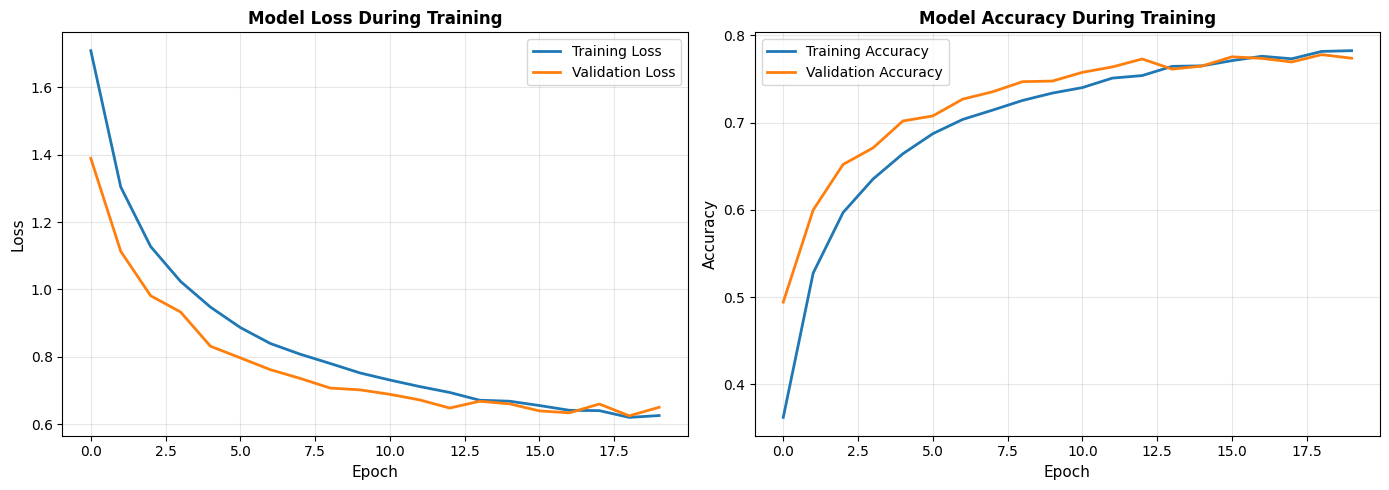


Final Training Metrics:
----------------------------------------------------------------------
Final Training Loss: 0.6255
Final Training Accuracy: 0.7825
Final Validation Loss: 0.6500
Final Validation Accuracy: 0.7739
Best Validation Accuracy: 0.7780 (Epoch 19)
----------------------------------------------------------------------


In [35]:
# Train the final model with best hyperparameters from grid search

# In practice, use the best hyperparameters from grid search

print("=" * 70)
print("TRAINING FINAL MODEL")
print("=" * 70)


best_lr = 0.001
best_batch_size = 64
best_dropout = 0.25
epochs = 20  # Increase for better results

print(f"Hyperparameters:")
print(f"  Learning Rate: {best_lr}")
print(f"  Batch Size: {best_batch_size}")
print(f"  Dropout Rate: {best_dropout}")
print(f"  Epochs: {epochs}")
print("=" * 70)

# Create final model with best hyperparameters
def create_final_model(dropout_rate=best_dropout):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv2d_1'),
        layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
        layers.Dropout(dropout_rate, name='dropout_1'),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_3'),
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_4'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
        layers.Dropout(dropout_rate, name='dropout_2'),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_5'),
        layers.MaxPooling2D((2, 2), name='max_pooling2d_3'),
        layers.Dropout(dropout_rate, name='dropout_3'),
        
        layers.Flatten(name='flatten'),
        layers.Dense(512, activation='relu', name='dense_1'),
        layers.Dropout(0.5, name='dropout_4'),
        layers.Dense(10, activation='softmax', name='dense_output')
    ])
    return model

# Create and compile final model
final_model = create_final_model(best_dropout)
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nFinal Model Architecture:")
final_model.summary()

# Define callbacks
callbacks = [
    # Early stopping: Stop training when validation loss stops improving
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    # Model checkpointing: Save best model during training
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Reduce learning rate on plateau
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

print("\n" + "=" * 70)
print("Starting Training...")
print("=" * 70)

# Train the model
history = final_model.fit(
    x_train, y_train_cat,
    batch_size=best_batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val_cat),
    callbacks=callbacks,
    verbose=2
)

print("\n" + "=" * 70)
print("Training Completed!")
print("=" * 70)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss curves
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Loss', fontsize=11)
axes[0].set_title('Model Loss During Training', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Accuracy curves
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Model Accuracy During Training', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Training Metrics:")
print("-" * 70)
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f} (Epoch {np.argmax(history.history['val_accuracy']) + 1})")
print("-" * 70)


### Model Evaluation


MODEL EVALUATION ON TEST SET

Test Set Results:
----------------------------------------------------------------------
Test Loss: 0.6365
Test Accuracy: 0.7823 (78.23%)
----------------------------------------------------------------------

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    airplane       0.84      0.76      0.80      1000
  automobile       0.92      0.87      0.89      1000
        bird       0.74      0.64      0.69      1000
         cat       0.61      0.62      0.62      1000
        deer       0.73      0.76      0.74      1000
         dog       0.72      0.70      0.71      1000
        frog       0.80      0.85      0.83      1000
       horse       0.79      0.85      0.82      1000
        ship       0.80      0.91      0.85      1000
       truck       0.88      0.87      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78 

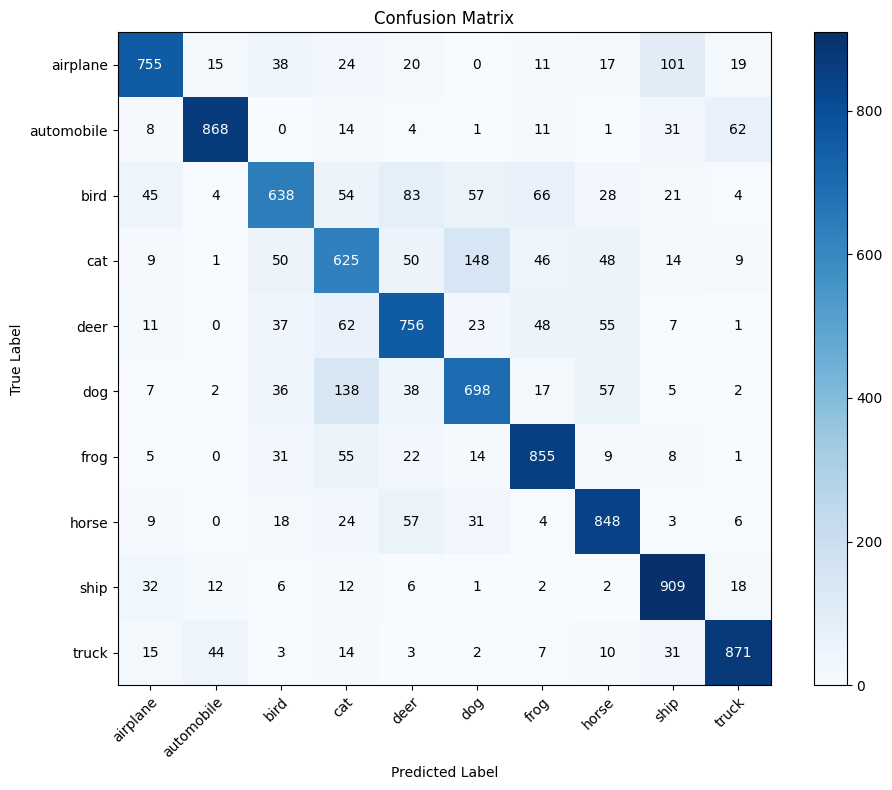


PER-CLASS ACCURACY
airplane    : 0.7550 (75.50%)
automobile  : 0.8680 (86.80%)
bird        : 0.6380 (63.80%)
cat         : 0.6250 (62.50%)
deer        : 0.7560 (75.60%)
dog         : 0.6980 (69.80%)
frog        : 0.8550 (85.50%)
horse       : 0.8480 (84.80%)
ship        : 0.9090 (90.90%)
truck       : 0.8710 (87.10%)

SAMPLE PREDICTIONS


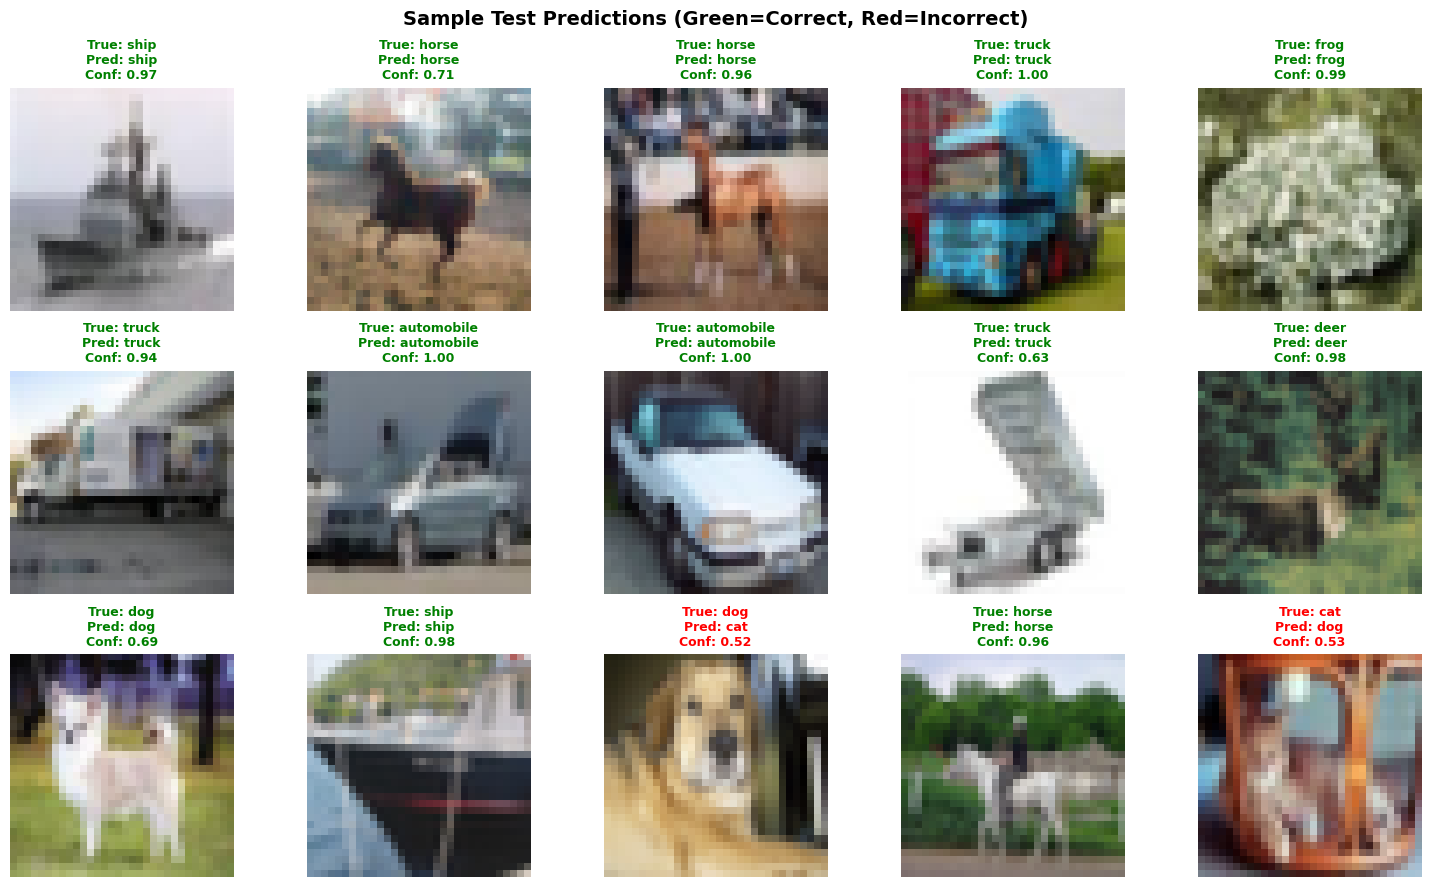


EVALUATION SUMMARY
Overall Test Accuracy: 0.7823 (78.23%)
Average Per-Class Accuracy: 0.7823 (78.23%)
Best Class Accuracy: ship (0.9090)
Worst Class Accuracy: cat (0.6250)


In [36]:
# Evaluate the model on test set
print("=" * 70)
print("MODEL EVALUATION ON TEST SET")
print("=" * 70)

# Evaluate on test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test_cat, verbose=0)

print(f"\nTest Set Results:")
print("-" * 70)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("-" * 70)

# Get predictions
y_pred_probs = final_model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "=" * 70)
print("CLASSIFICATION REPORT")
print("=" * 70)
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

# Rotate labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Per-class accuracy
print("\n" + "=" * 70)
print("PER-CLASS ACCURACY")
print("=" * 70)
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracies)):
    print(f"{class_name:12s}: {acc:.4f} ({acc*100:.2f}%)")

# Visualize some predictions
print("\n" + "=" * 70)
print("SAMPLE PREDICTIONS")
print("=" * 70)

# Select random samples
num_samples = 15
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
for idx, img_idx in enumerate(sample_indices):
    row = idx // 5
    col = idx % 5
    
    # Display image
    axes[row, col].imshow(x_test[img_idx], interpolation='nearest')
    
    # Get prediction
    true_label = class_names[y_true[img_idx]]
    pred_label = class_names[y_pred[img_idx]]
    confidence = y_pred_probs[img_idx][y_pred[img_idx]]
    
    # Color: green if correct, red if incorrect
    color = 'green' if y_true[img_idx] == y_pred[img_idx] else 'red'
    
    axes[row, col].set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}",
                            fontsize=9, color=color, fontweight='bold')
    axes[row, col].axis('off')

plt.suptitle('Sample Test Predictions (Green=Correct, Red=Incorrect)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "=" * 70)
print("EVALUATION SUMMARY")
print("=" * 70)
print(f"Overall Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Average Per-Class Accuracy: {class_accuracies.mean():.4f} ({class_accuracies.mean()*100:.2f}%)")
print(f"Best Class Accuracy: {class_names[np.argmax(class_accuracies)]} ({class_accuracies.max():.4f})")
print(f"Worst Class Accuracy: {class_names[np.argmin(class_accuracies)]} ({class_accuracies.min():.4f})")
print("=" * 70)


In [37]:
# =========================
# Task 3 - Section F: Data Augmentation (ADDED)
# =========================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1) Define augmentation pipeline (applied only during training)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.08),
        layers.RandomZoom(0.10),
        layers.RandomTranslation(0.10, 0.10),
    ],
    name="data_augmentation",
)

# 2) Build a model that matches your CNN but adds augmentation at the input
def build_augmented_cnn(input_shape=(32, 32, 3), num_classes=10, dropout_conv=0.25, dropout_dense=0.5, lr=0.001):
    inputs = keras.Input(shape=input_shape)

    x = data_augmentation(inputs)  # augmentation ONLY active when training=True internally
    # --- CNN body (kept standard / non-exotic to avoid changing your project intent) ---
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="valid")(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="valid")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_conv)(x)

    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="valid")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_conv)(x)

    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_conv)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(dropout_dense)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="cnn_with_augmentation")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

# 3) Train augmented model (separate from your existing training run)
aug_model = build_augmented_cnn(
    input_shape=(32, 32, 3),
    num_classes=10,
    dropout_conv=0.25,
    dropout_dense=0.5,
    lr=0.001
)

aug_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

print("=" * 70)
print("TRAINING MODEL WITH DATA AUGMENTATION (for Section F)")
print("=" * 70)

aug_history = aug_model.fit(
    x_train, y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=20,
    batch_size=64,
    callbacks=aug_callbacks,
    verbose=1
)

# 4) Evaluate on test set
aug_test_loss, aug_test_acc = aug_model.evaluate(x_test, y_test_cat, verbose=0)

print("\nAugmented Model Test Results:")
print(f"  Test Loss:     {aug_test_loss:.4f}")
print(f"  Test Accuracy: {aug_test_acc:.4f}")


TRAINING MODEL WITH DATA AUGMENTATION (for Section F)
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3122 - loss: 1.8420 - val_accuracy: 0.3724 - val_loss: 1.7563
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4326 - loss: 1.5430 - val_accuracy: 0.4818 - val_loss: 1.3903
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4828 - loss: 1.4179 - val_accuracy: 0.5066 - val_loss: 1.3461
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5121 - loss: 1.3458 - val_accuracy: 0.5440 - val_loss: 1.2870
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5331 - loss: 1.2903 - val_accuracy: 0.5838 - val_loss: 1.1709
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5498 - loss: 1.2570 - val_accuracy: 0.5689 - val_loss: 1.2180
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5609 - loss: 1.2216 - val_accuracy: 0.5966 - val_loss: 1.1245
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━

In [38]:
# =========================
# Task 3 - Sections I-3 / I-4: Baseline Model for Comparison (ADDED)
# =========================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_baseline_cnn(input_shape=(32, 32, 3), num_classes=10, lr=0.001):
    """
    Baseline CNN: intentionally simpler than the final model
    - Fewer conv layers
    - No dropout
    - No data augmentation
    This provides a clean reference point for Sections I-3 and I-4.
    """
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation="relu", padding="valid")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation="relu", padding="valid")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="baseline_cnn")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

baseline_model = build_baseline_cnn(input_shape=(32, 32, 3), num_classes=10, lr=0.001)

baseline_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
]

print("=" * 70)
print("TRAINING BASELINE MODEL (for Sections I-3 / I-4)")
print("=" * 70)

baseline_history = baseline_model.fit(
    x_train, y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=20,
    batch_size=64,
    callbacks=baseline_callbacks,
    verbose=1
)

baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test_cat, verbose=0)

print("\nBaseline Model Test Results:")
print(f"  Test Loss:     {baseline_test_loss:.4f}")
print(f"  Test Accuracy: {baseline_test_acc:.4f}")

# NOTE:
# In the next cell (after this), we can build a small results table that compares:
# - baseline_test_acc/loss
# - your final model test acc/loss (from earlier)
# - aug_test_acc/loss (from Section F)


TRAINING BASELINE MODEL (for Sections I-3 / I-4)
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4476 - loss: 1.5332 - val_accuracy: 0.5530 - val_loss: 1.2781
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5913 - loss: 1.1669 - val_accuracy: 0.6023 - val_loss: 1.1286
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6455 - loss: 1.0152 - val_accuracy: 0.6308 - val_loss: 1.0584
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6831 - loss: 0.9147 - val_accuracy: 0.6472 - val_loss: 1.0132
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7110 - loss: 0.8344 - val_accuracy: 0.6615 - val_loss: 0.9792
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7360 - loss: 0.7651 - val_accuracy: 0.6692 - val_loss: 0.9657
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7598 - loss: 0.7016 - val_accuracy: 0.6688 - val_loss: 0.9760
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - a

In [39]:
# =========================
# Task 3 - Sections I-3 / I-4: Comparison Summary (NO pandas)
# =========================

final_test_acc = globals().get("final_test_acc", None)
final_test_loss = globals().get("final_test_loss", None)

print("=" * 70)
print("MODEL PERFORMANCE COMPARISON (TEST SET)")
print("=" * 70)

print(f"Baseline CNN:")
print(f"  Test Accuracy: {baseline_test_acc:.4f}")
print(f"  Test Loss:     {baseline_test_loss:.4f}")
print("  Notes: Simpler architecture, no dropout, no data augmentation\n")

if final_test_acc is not None and final_test_loss is not None:
    print(f"Final CNN:")
    print(f"  Test Accuracy: {final_test_acc:.4f}")
    print(f"  Test Loss:     {final_test_loss:.4f}")
    print("  Notes: Deeper architecture with regularization\n")

print(f"Augmented CNN:")
print(f"  Test Accuracy: {aug_test_acc:.4f}")
print(f"  Test Loss:     {aug_test_loss:.4f}")
print("  Notes: RandomFlip, RandomRotation, RandomZoom, RandomTranslation\n")

print("-" * 70)
print("Accuracy Differences (relative to baseline):")

if final_test_acc is not None:
    print(f"  Final vs Baseline: {final_test_acc - baseline_test_acc:+.4f}")

print(f"  Augmented vs Baseline: {aug_test_acc - baseline_test_acc:+.4f}")
print("=" * 70)


MODEL PERFORMANCE COMPARISON (TEST SET)
Baseline CNN:
  Test Accuracy: 0.6710
  Test Loss:     0.9671
  Notes: Simpler architecture, no dropout, no data augmentation

Augmented CNN:
  Test Accuracy: 0.6687
  Test Loss:     0.9347
  Notes: RandomFlip, RandomRotation, RandomZoom, RandomTranslation

----------------------------------------------------------------------
Accuracy Differences (relative to baseline):
  Augmented vs Baseline: -0.0023


---

## Export Instructions

To export this notebook for submission:

### Export to HTML:
```bash
jupyter nbconvert --to html neural_network_development.ipynb
```

